# Car Buyer Prediction using Social Network Ads

This dataset contains information of users in a social network. Those informations are the user id, the gender, the age and the estimated salary. A car company has just launched their brand new luxury SUV. And we're trying to see which of these users of the social network are going to buy this brand new SUV And the last column here tells If yes or no the user bought this SUV we are going to build a model that is going to predict if a user is going to buy or not the SUV based on two variables which are going to be the age and the estimated salary. So our matrix of feature is only going to be these two columns. We want to find some correlations between the age and the estimated salary of a user and his decision to purchase yes or no the SUV.

# Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

# Data cleaning

In [3]:
df.shape

(400, 5)

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [6]:
df['Gender'] = df.Gender.map({'Male':1,'Female':0})

Changing the datatype of Gender from string to int by doing label encoding.

In [7]:
del df['User ID']

Since, the User ID column is unique for every user, it will not be useful for prediction. So, we can delete this column. 

In [8]:
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
df = df.drop_duplicates()
df.shape

(380, 4)

In [10]:
df['Purchased'].value_counts()

0    240
1    140
Name: Purchased, dtype: int64

In [11]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [12]:
df.describe()

,Gender,Age,EstimatedSalary,Purchased
count,380.000000,380.000000,380.000000,380.000000
mean,0.478947,37.586842,70421.052632,0.368421
std,0.500215,10.592492,34604.155483,0.483012
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.000000,43000.000000,0.000000
50%,0.000000,37.000000,70500.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


In [13]:
# Age
iqr = df['Age'].quantile(0.75) - df['Age'].quantile(0.25)
print('IQR :',iqr)
upper_threshold = df['Age'].quantile(0.75) + (1.5 * iqr)
print('Upper Threshold :',upper_threshold)
lower_threshold = df['Age'].quantile(0.25) - (1.5 * iqr)
print('Lower Threshold :',lower_threshold)

IQR : 17.0
Upper Threshold : 71.5
Lower Threshold : 3.5


In [14]:
# Estimated Salary
iqr = df['EstimatedSalary'].quantile(0.75) - df['EstimatedSalary'].quantile(0.25)
print('IQR :',iqr)
upper_threshold = df['EstimatedSalary'].quantile(0.75) + (1.5 * iqr)
print('Upper Threshold :',upper_threshold)
lower_threshold = df['EstimatedSalary'].quantile(0.25) - (1.5 * iqr)
print('Lower Threshold :',lower_threshold)

IQR : 45000.0
Upper Threshold : 155500.0
Lower Threshold : -24500.0


There are no duplicates and outliers in the data.

# EDA

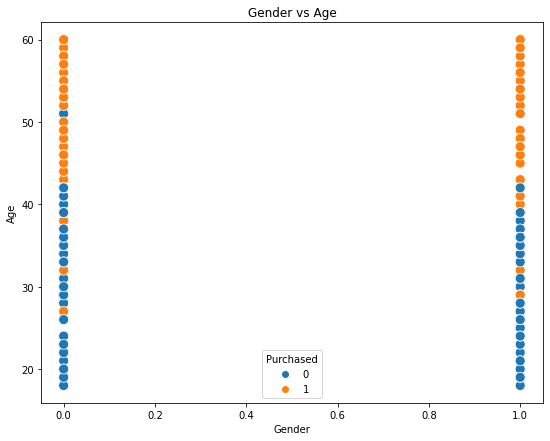

In [15]:
# Gender vs Age
plt.figure(figsize=(9,7))
sns.scatterplot(x = 'Gender', y = 'Age', hue = 'Purchased', data =df, s = 100)
plt.title('Gender vs Age')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

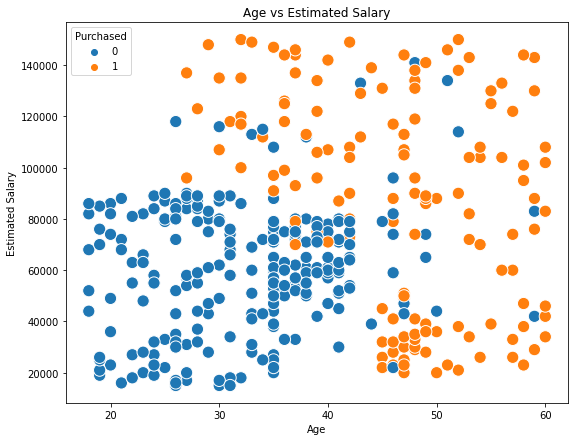

In [16]:
# Age vs Estimated Salary
plt.figure(figsize=(9,7))
sns.scatterplot(x = 'Age', y = 'EstimatedSalary', hue = 'Purchased', data =df, s = 150)
plt.title('Age vs Estimated Salary')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

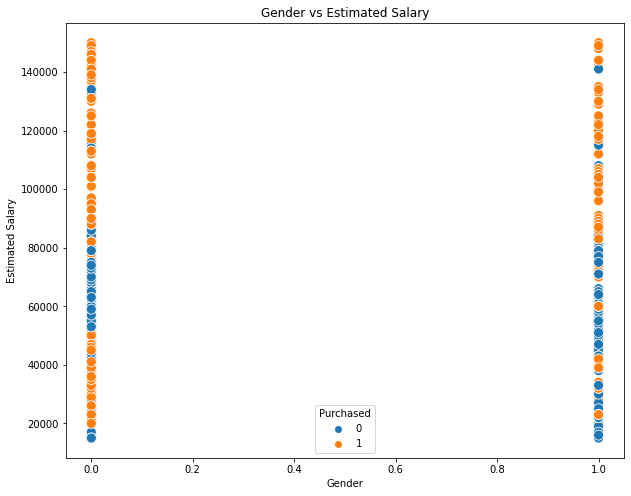

In [17]:
# Gender vs Estimated Salary
plt.figure(figsize=(10,8))
sns.scatterplot(x = 'Gender', y = 'EstimatedSalary', hue = 'Purchased', data =df, s = 100)
plt.title('Gender vs Estimated Salary')
plt.xlabel('Gender')
plt.ylabel('Estimated Salary')
plt.show()

Here, gender, age and salary are the features and purchased is the target.

As the target is given, it is a supervised learning problem and as the target is a categorical data, it is a classification problem.

From the above graph, we can see there is a linear decision boundary between the features. So, it is good to go with Logistic Regression Model.

# Data preparation

In [18]:
X = df[['Gender','Age','EstimatedSalary']].values # Features
y = df['Purchased'].values  # Target

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 555)

In [20]:
X_train.shape, X_test.shape

((266, 3), (114, 3))

We have splitted the dataset into train and test.


*   70% for training
*   30% for testing



In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

We have also done feature scaling here using Standard Scaler.

# Model training

In [22]:
from sklearn.linear_model import LogisticRegression
regressor= LogisticRegression()
regressor.fit(X_train_scaled, y_train)

LogisticRegression()

We have fitted the logistic regression model to our dataset.

In [23]:
print('Coefficient :', regressor.coef_)
print('Intercept :', regressor.intercept_)

Coefficient : [[0.24712924 2.15093105 0.98073527]]
Intercept : [-1.03016793]


# Prediction

In [24]:
y_pred = regressor.predict(X_test_scaled)

Testing the model for new data.

In [25]:
regressor.predict_proba(scaler.transform(np.array([[1,30,40000]])))

array([[0.95589729, 0.04410271]])

When the age is 30 and the estimated salary is to be 50,000, there is only 4% possibility for the user to buy the SUV.

In [26]:
regressor.predict_proba(scaler.transform(np.array([[0,40,150000]])))

array([[0.15862208, 0.84137792]])

When the age is 40 and the estimated salary is to be 1,50,000, there is 84% possibility for the user to buy the SUV.

# Evaluation metric

In [27]:
from sklearn.metrics import accuracy_score, plot_roc_curve, confusion_matrix, f1_score
print('Accuracy Score :', accuracy_score(y_test,y_pred))
#print('Accuracy :', regressor.score(X_test_scaled,y_test)) ---> same as above
print('F1 Score :', f1_score(y_test,y_pred)) 

Accuracy Score : 0.8596491228070176
F1 Score : 0.8181818181818182


Confusion Matrix : [[62  8]
 [ 8 36]]
AUROC : <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7fcbcf270160>


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


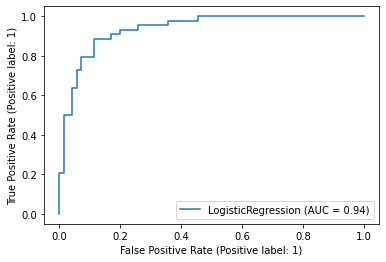

In [28]:
print('Confusion Matrix :', confusion_matrix(y_test,y_pred))
print('AUROC :', plot_roc_curve(regressor, X_test_scaled, y_test))

As we got the AUROC Score to be 0.94, we can conclude that it is a very good model to predict the car buyer using age and estimated salary with 94% accuracy.
